# Modeling
___

Below is a Logisitc Regression Model using a Pipeline and Count Vectorization. Accuracy = 91.3%.

---

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import plot_confusion_matrix
import sklearn.metrics as metrics

## Load the data
---

In [2]:
df = pd.read_csv('../../data/data_clean_20220227-141901.csv')
df.drop(columns = 'Unnamed: 0', inplace=True)
df.head()

,author,title,selftext,created_utc,title_length,title_word_count,subreddit_target
0,RealDaveCorey,"Trying to straighten my leaning garage, was th...","Hi, I'm looking at torturing my leaning garage...",1645985955,78,12,0
1,ZeroCool1,Thoughts from two years into purchasing a fixe...,A few random thoughts after I've wrestled with...,1645985873,53,9,0
2,gwenstellamade,HELP! Fireplace contractors screwed up the job,"So, I’m in a bit of a pickle with my current f...",1645985865,46,7,0
3,happybaconbit,Kitchen cabinet track is broken. How do I fix it?,Photo: https://imgur.com/a/XgNq0iG \n\nIt’s be...,1645985826,49,10,0
4,stonetime10,OTR microwave with stud In the way,"Hello everyone,\nI am almost finished my basem...",1645985457,34,7,0


## Create X and y
---

In [3]:
X = df['title']
X.head()

0    Trying to straighten my leaning garage, was th...
1    Thoughts from two years into purchasing a fixe...
2       HELP! Fireplace contractors screwed up the job
3    Kitchen cabinet track is broken. How do I fix it?
4                   OTR microwave with stud In the way
Name: title, dtype: object

In [4]:
y = df['subreddit_target']

## Baseline Accuracy
---

In [5]:
y.value_counts(normalize = True)

0    0.502137
1    0.497863
Name: subreddit_target, dtype: float64

It is essentially a 50/50 split. There is a slight preference towards HomeImprovement. So the baseline/null model will predict HomeImprovement and be accurate about 50% of the time. 

## Train - Test Split
---

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 33, stratify = y)

Want to keep the split to about 50/50 for the model, hence why this is being stratified.

## Pipeline
---
Will start with a pipeline including Count Vectorization and a logistic regresison model.

In [7]:
pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('logreg', LogisticRegression(solver = 'liblinear'))
])

## GridSearchCV
___

In [10]:
params ={
    'vect__stop_words': ['english'], #removed none
    'vect__min_df': range(1, 10, 2), 
    'vect__max_df': [1.0, 0.75, 0.5, 0.25], 
    'vect__binary': [True, False],
    'vect__ngram_range':[(1,3)], #removed (1,1) and (1,2)
    'vect__max_features': [1000, 1500, 2000, 3000, 4000],
    'logreg__penalty': ['l2'] #took out l1.
}

gs = GridSearchCV(pipe,
                 param_grid=params)

gs.fit(X_train, y_train)
print(gs.best_score_) 
gs.best_params_

0.9161641541038525


{'logreg__penalty': 'l2',
 'vect__binary': False,
 'vect__max_df': 1.0,
 'vect__max_features': 3000,
 'vect__min_df': 1,
 'vect__ngram_range': (1, 3),
 'vect__stop_words': 'english'}

Elasticnet is below. Ran this with a l1 ratio of 0.5. The score was not as good as the l2 model above. Going to comment out becuase there were many convergence warnings. 

In [9]:
# pipe1 = Pipeline([
#     ('vect', CountVectorizer()),
#     ('logreg', LogisticRegression(solver = 'saga'))
# ])

In [10]:
# params1 ={
#     'vect__stop_words': [None, 'english'], 
#     'vect__min_df': range(1, 10, 2), 
#     'vect__max_df': [1.0, 0.75, 0.5, 0.25], 
#     'vect__binary': [True, False],
#     'logreg__penalty': ['elasticnet'],
#     'logreg__l1_ratio': [0.5]
# }

# gs1 = GridSearchCV(pipe1,
#                  param_grid=params1)

# gs1.fit(X_train, y_train)
# print(gs1.best_score_) 
# gs1.best_params_

## Model Evaluation
---

Using the GridSearch model above. 

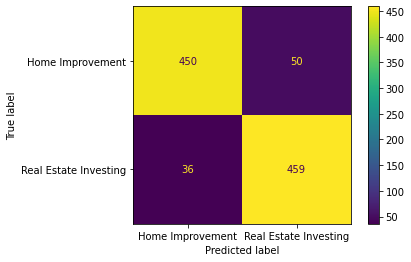

In [11]:
plot_confusion_matrix(gs, X_test, y_test, display_labels= ['Home Improvement', 'Real Estate Investing'])

In [12]:
trainscore = gs.score(X_train, y_train)
testscore = gs.score(X_test, y_test)
crossval = cross_val_score(gs, X_train, y_train).mean()
preds = gs.predict(X_test)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, preds).ravel()
recall = metrics.recall_score(y_test, preds)
precision = metrics.precision_score(y_test, preds)
accuracy = testscore
specificity = tn / (tn + fp)

print (f'Train Score = {trainscore}')
print (f'Test Score = {testscore}')
print (f'Cross Val Score = {crossval}')
print (f'Accuracy Score = {testscore}')
print (f'Recall Score = {recall}')
print (f'Precision Score = {precision}')
print (f'Specificity Score = {specificity}')

Train Score = 0.9892689470154259
Test Score = 0.91356783919598
Cross Val Score = 0.925553944217733
Accuracy Score = 0.91356783919598
Recall Score = 0.9272727272727272
Precision Score = 0.9017681728880157
Specificity Score = 0.9
